In [5]:
#from adios2toolspy import SuperCell, Particles, Fields
from h5toolspy import H5Processor
from picplot import plotGrid, gridHist
import matplotlib
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [16, 8]

Loading hx_fc from File: tfd.029000.xdmf
Loading rho_e from File: tfd_moments.029000.xdmf
Loading jz_ec from File: tfd.029000.xdmf


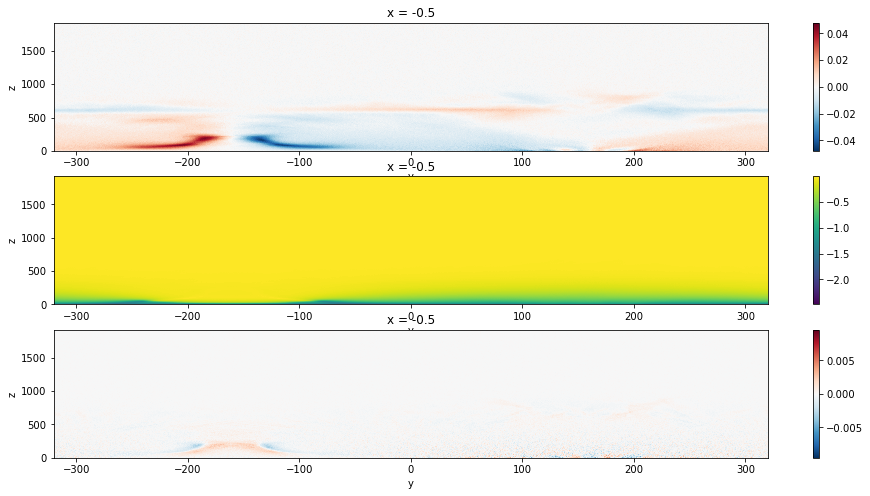

In [2]:

root = '/gpfs/alpine/proj-shared/fus137/johnd/flatfoil-summit_10-29/run2Dratio01TripleNI1000/'
plotGrid(root, ['hx_fc', 'rho_e', 'jz_ec'], [-1], zrange=(0,None))


Loading hx_fc from File: tfd.029000.xdmf


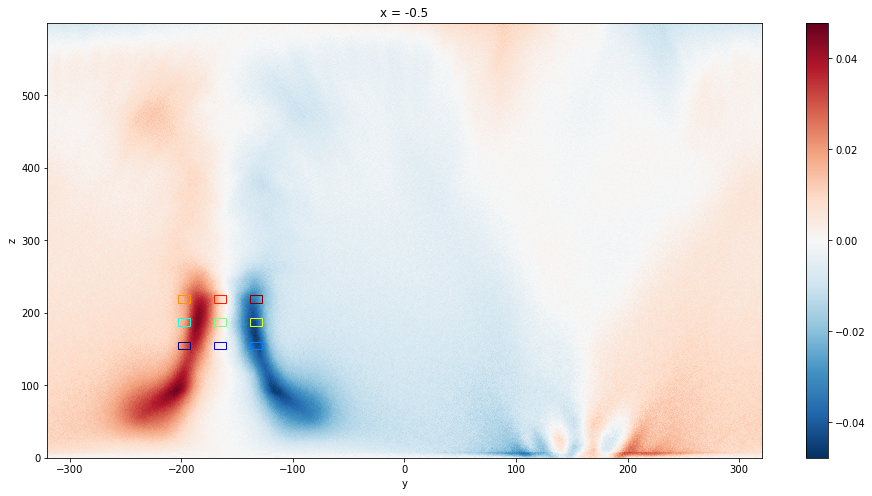

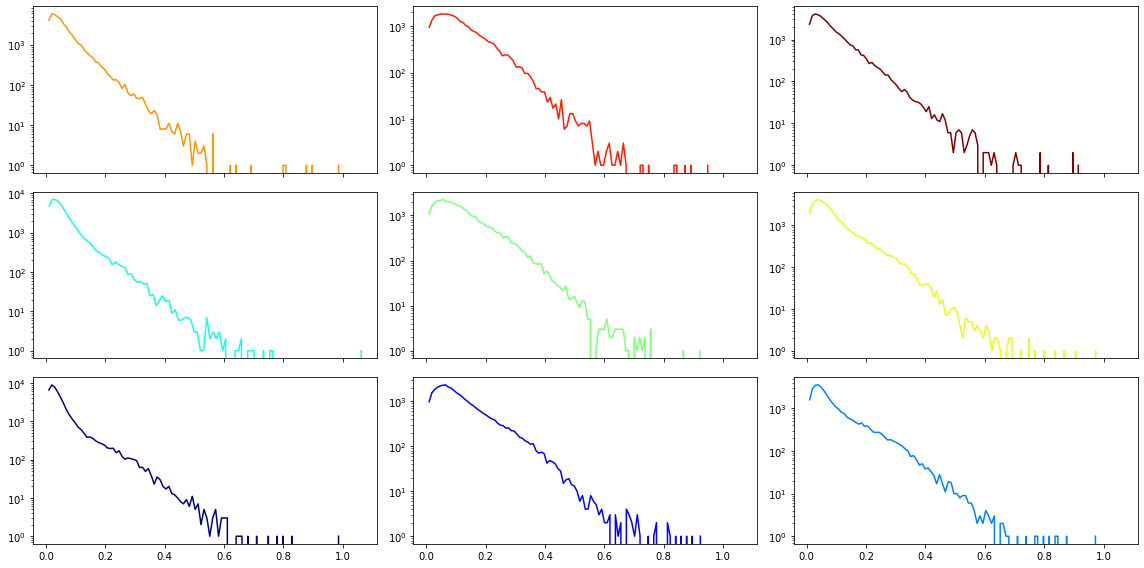

In [3]:
origin = (-195, 150)
gridHist(root, 'hx_fc', -1, (3, 3), origin, zrange=(0,600))

Loading txx_e from File: tfd_moments.017000.xdmf
Loading tyy_e from File: tfd_moments.017000.xdmf
Loading tzz_e from File: tfd_moments.017000.xdmf
Loading rho_e from File: tfd_moments.017000.xdmf
(-16.0, 96.26504141272085) 32 32
(-16.0, 192.28004375683713) 32 32
(-16.0, 288.2950461009532) 32 32
(-16.0, 384.31004844506947) 32 32
(-16.0, 496.327551179872) 32 32
(-16.0, 592.342553523988) 32 32
(-16.0, 688.3575558681046) 32 32
(-16.0, 784.3725582122206) 32 32
(-16.0, 896.3900609470229) 32 32


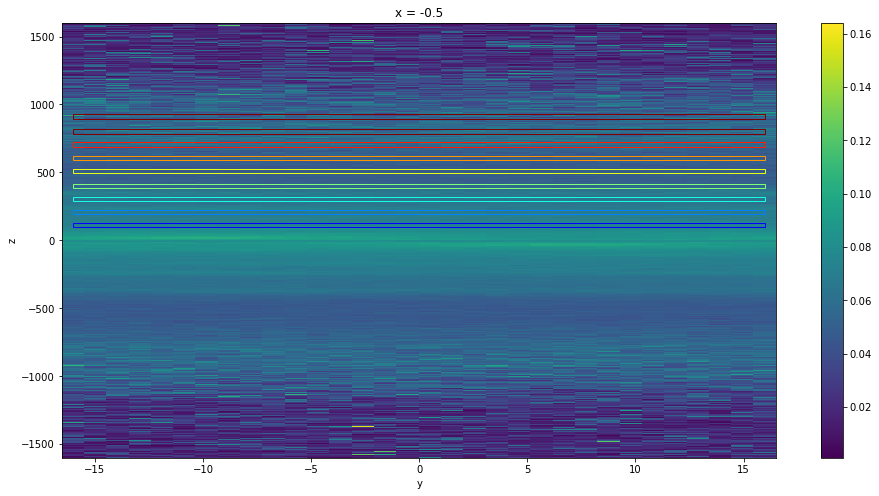

In [9]:
root = '/gpfs/alpine/proj-shared/fus137/johnd/flatfoil-summit_10-5/ratio001NoCollision/' #0.01

globalDims = (1, 32, 2*1600)
corner = (0, 0, 2*1600)
numPatches=1
cellsPerPatch=32

time = -1

h5p = H5Processor(root)


txx = h5p.getH5Grid('txx_e', time)
tyy = h5p.getH5Grid('tyy_e', time)
tzz = h5p.getH5Grid('tzz_e', time)
rho = -h5p.getH5Grid('rho_e', time)
temp = 1/3*(txx+tyy+tzz)/rho
temp.plot()

c = np.arange(1,10)
norm = matplotlib.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.jet)
cmap.set_array([])
histData = []
for i in range(1, 1+len(c)):
    subspace = h5p.selectSubSpace((-5,2), (i*100,i*100+50), color=cmap.to_rgba(i+1))
    histData.append(subspace)